In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [3]:
df = pd.read_csv('spam_or_not_spam.csv')
df.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [15]:
value_count = df['label'].value_counts()
value_count

label
0    2500
1     500
Name: count, dtype: int64

<BarContainer object of 2 artists>

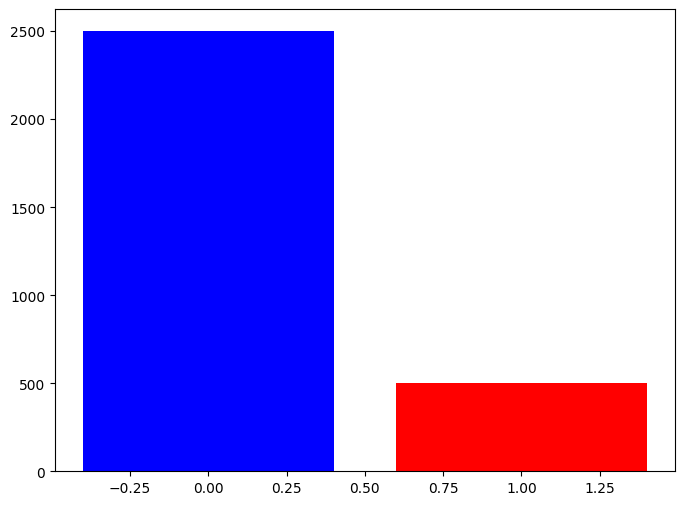

In [16]:
plt.figure(figsize=(8,6))
plt.bar(value_count.index, value_count.values, color=['blue', 'red'])

In [19]:
#drop rows with missing values
df = df.dropna()
#print new shape of data frame
print('new data frame shape:', df.shape)

new data frame shape: (2999, 2)


In [20]:
blanks = [] 
for i, email, label in df.itertuples():
    if email.isspace():
        blanks.append(i)
print(len(blanks), '    |    ', 'blanks:  ',blanks)

2     |     blanks:   [2806, 2828]


In [21]:
df.iloc[blanks]

,email,label
2806,,1
2828,,1


In [22]:
df.drop(blanks, inplace=True)
print('new data frame shape:', df.shape)

new data frame shape: (2997, 2)


In [31]:
from nltk.corpus import stopwords 
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
sw = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/naeimiz/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nl